In [1]:
# uniquement pour utliser dans colab : 

# !git clone https://github.com/CarinePivoteau/Alea2023Notebooks.git
# import sys
# sys.path.append('/content/Alea2023Notebooks')

In [2]:
# si les modules ne sont pas installés :

# import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install graphviz

In [3]:
# imports : random, time, math, sys, plt, graphviz

from helpers import *

In [4]:
def random_binary_tree_BGW_free(max):
    size = 0
    def random_BGW():
        nonlocal size # compteur global
        size += 1
        if size > max:
            raise Exception("Too large")
        left = random_BGW() if flip_a_coin() else []
        right = random_BGW() if flip_a_coin() else []    
        return ['z', left, right]
    try:
        return random_BGW(), size
    except Exception as err:
        #print(err)
        return None, 0

In [38]:
t,s = random_binary_tree_BGW_free(100)
print(t,s)

['z', [], ['z', [], []]] 2


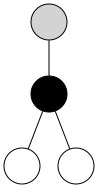

In [6]:
draw_tree_unlabelled(t,5,5)

In [7]:
def random_binary_tree_BGW(n):
    nb_trials, size_trials = 0, 0
    while True :
        t,s = random_binary_tree_BGW_free(n)
        nb_trials += 1
        size_trials += s
        if s == n:
            return nb_trials,size_trials,t

def random_binary_tree_BGW_approx(mini, maxi):
    nb_trials, size_trials = 0, 0
    while True :
        t,s = random_binary_tree_BGW_free(maxi)
        nb_trials += 1
        if nb_trials % 100 == 0 :
            print(".", end = "")
        size_trials += s
        if mini <= s <= maxi:
            print()
            return nb_trials,size_trials,t,s
        

In [8]:
print(random_binary_tree_BGW(100))

(1140, 9901, ['z', ['z', ['z', ['z', [], []], ['z', [], []]], ['z', [], ['z', ['z', [], ['z', [], ['z', [], ['z', ['z', ['z', ['z', [], []], ['z', ['z', [], ['z', [], ['z', [], []]]], []]], ['z', [], []]], ['z', ['z', [], []], []]]]]], ['z', [], []]]]], ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', [], ['z', [], []]], []]], ['z', [], ['z', ['z', [], ['z', ['z', ['z', [], []], []], []]], ['z', [], ['z', [], ['z', ['z', ['z', ['z', ['z', [], ['z', [], ['z', [], []]]], ['z', ['z', [], []], []]], ['z', [], []]], []], ['z', [], ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', [], []], []], []], ['z', [], []]]], ['z', [], ['z', ['z', [], []], []]]], []], ['z', [], []]], []], ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', [], []]], []], []], []], []], ['z', [], []]], []], []]], []], ['z', [], ['z', [], []]]], ['z', ['z', [], []], []]]], []]]]]]]]]], ['z', [], []]], []], []]], ['z', ['z', ['z', ['z', [], []],

In [9]:
print(random_binary_tree_BGW_approx(90,110))

..
(256, 2282, ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', [], ['z', ['z', [], []], []]], ['z', [], []]], []]], []], []], ['z', ['z', [], []], []]], ['z', [], []]], ['z', ['z', ['z', ['z', [], []], ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', ['z', [], []], ['z', ['z', ['z', [], []], []], ['z', [], ['z', [], []]]]], []], ['z', [], ['z', ['z', ['z', [], ['z', [], []]], []], []]]], ['z', ['z', ['z', ['z', [], []], ['z', ['z', [], ['z', ['z', [], ['z', [], []]], []]], ['z', [], []]]], []], ['z', [], ['z', ['z', ['z', [], ['z', ['z', [], ['z', [], ['z', [], []]]], ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', [], []], []], []], []], []]], ['z', ['z', ['z', [], ['z', ['z', [], []], ['z', [], ['z', [], []]]]], ['z', ['z', [], ['z', ['z', ['z', [], ['z', [], []]], []], []]], []]], ['z', [], []]]]]], ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', [], ['z', [], []]], []], []], []], ['z', [], []]]], ['z', [], []]], []]], []]]]], ['z', [], []]], []]]], []], []]

In [10]:
count_occurences(lambda : random_binary_tree_BGW(3)[2],100000)

nb: 5
['z', ['z', [], []], ['z', [], []]] 20.07
['z', ['z', ['z', [], []], []], []] 19.97
['z', [], ['z', [], ['z', [], []]]] 20.01
['z', ['z', [], ['z', [], []]], []] 20.08
['z', [], ['z', ['z', [], []], []]] 19.87


{"['z', ['z', [], []], ['z', [], []]]": 20068,
 "['z', ['z', ['z', [], []], []], []]": 19972,
 "['z', [], ['z', [], ['z', [], []]]]": 20014,
 "['z', ['z', [], ['z', [], []]], []]": 20080,
 "['z', [], ['z', ['z', [], []], []]]": 19866}

In [11]:
#plot_time(lambda i:random_binary_tree_BGW_approx(i-i/10,i+i/10), 2000, nb_steps=50, nb=100)

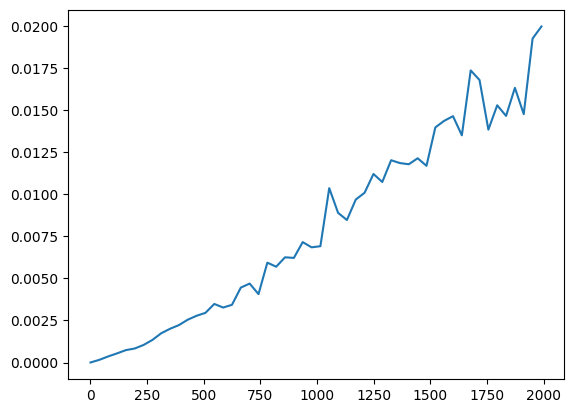

In [12]:
nb_trials,size_trials,t,size = random_binary_tree_BGW_approx(900,1_100)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
print(t)


nombre d'essais = 11, taille du rejet = 1378, taille de l'arbre = 1033

['z', [], ['z', [], ['z', ['z', [], []], ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', [], ['z', [], []]], ['z', ['z', [], ['z', [], []]], ['z', [], ['z', ['z', [], ['z', [], []]], ['z', [], ['z', ['z', [], ['z', [], []]], ['z', ['z', [], []], ['z', [], []]]]]]]]], ['z', [], []]], ['z', ['z', ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', [], []], []]], ['z', ['z', ['z', ['z', ['z', ['z', ['z', [], []], ['z', ['z', [], []], []]], []], ['z', ['z', ['z', [], ['z', ['z', [], ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', [], ['z', [], ['z', ['z', [], []], ['z', [], []]]]]], []], ['z', ['z', ['z', ['z', [], ['z', ['z', [], []], []]], []], []], []]], []], ['z', ['z', ['z', ['z', [], []], []], ['z', ['z', [], ['z', ['z', ['z', [], []], ['z', [], ['z', ['z', [], []], []]]], ['z', [], ['z', [], []]]]], []]], ['z', [], []]]], ['z', ['z', [], []], ['z', [], [

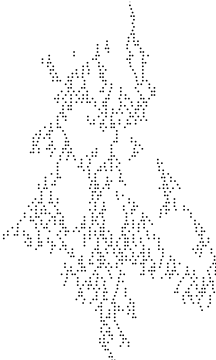

In [13]:
draw_tree_unlabelled(t,5,5)

In [14]:
nb_trials,size_trials,t,size = random_binary_tree_BGW_approx(9_000,11_000)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
#print(t)

..
nombre d'essais = 262, taille du rejet = 29133, taille de l'arbre = 9293



In [15]:
#draw_tree_unlabelled(t,10,10)

In [16]:
t = time.time()
nb_trials,size_trials,_,size = random_binary_tree_BGW_approx(90_000,110_000)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
print(time.time() - t)

.....................................
nombre d'essais = 3736, taille du rejet = 1234195, taille de l'arbre = 90269

2.288123846054077


In [17]:
t = time.time()
nb_trials,size_trials,_,size = random_binary_tree_BGW_approx(900_000,1_100_000)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
print(time.time() - t)

................................................................................................................................................................................................................................................................................................................
nombre d'essais = 30489, taille du rejet = 29346686, taille de l'arbre = 944017

47.32723617553711


In [18]:
t = time.time()
nb_trials,size_trials,_,size = random_binary_tree_BGW_approx(1_000_000,2_000_000)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
print(time.time() - t)

............................................................................................................................................................................................................................
nombre d'essais = 22001, taille du rejet = 24949873, taille de l'arbre = 1468308

42.00440716743469


In [19]:
def counts_max_and_average(gen,nb):
    counts = []
    discard = 0
    for i in range(nb):
        size = gen()
        if size > 0:
            counts.append(size)
        else:
            discard +=1
    print("trop grands = {}, taille max = {}, moyenne des tailles = {}".format(discard, max(counts), sum(counts)/nb))
    return counts

In [20]:
n = 100_000
l = counts_max_and_average(lambda : random_binary_tree_BGW_free(1000)[1], n)

trop grands = 3542, taille max = 1000, moyenne des tailles = 33.97196


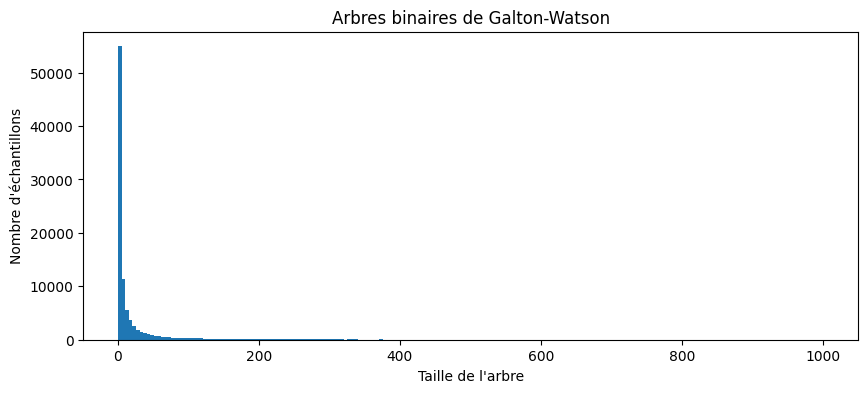

<Figure size 2000x400 with 0 Axes>

In [21]:
plt.rcParams['figure.figsize'] = [10, 4]

plt.hist(l,bins=200)
plt.title("Arbres binaires de Galton-Watson")
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
f = plt.figure()
f.set_figwidth(20)
plt.show()

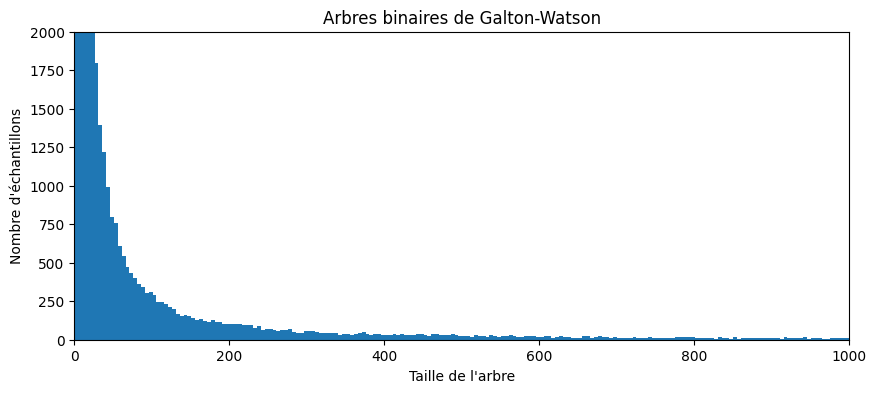

In [22]:
plt.rcParams['figure.figsize'] = [10,4]
plt.hist(l,bins=200)
plt.title("Arbres binaires de Galton-Watson")
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
plt.axis([0, 1000, 0, 2000])
plt.show()

In [23]:
def random_binary_tree_BGW_free2(maxi): # affichage de la taille maximale d'un sous-arbre "terminé" lors du processus
    size = 0
    max_subtree_size = 0
    def random_BGW():
        nonlocal size, max_subtree_size # compteur global
        size += 1
        if size > maxi:
            raise Exception("Too large, max subtree size = " + str(max_subtree_size))
        left,sl = random_BGW() if flip_a_coin() else ([],0)
        max_subtree_size = max(max_subtree_size,sl)
        right,sr = random_BGW() if flip_a_coin() else ([],0)
        max_subtree_size = max(max_subtree_size,sr)  
        return ['z', left, right],(1+sl+sr)
    try:
        return random_BGW()
    except Exception as err:
        print(err)
        return None, 0

for _ in range(1000):
    random_binary_tree_BGW_free2(10000)

Too large, max subtree size = 3731
Too large, max subtree size = 8875
Too large, max subtree size = 3063
Too large, max subtree size = 3225
Too large, max subtree size = 8222
Too large, max subtree size = 5463
Too large, max subtree size = 8278
Too large, max subtree size = 7315
Too large, max subtree size = 5088
Too large, max subtree size = 3552
Too large, max subtree size = 6259
